In [626]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import OutlierTrimmer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [627]:
pd.set_option('display.max_columns', data.shape[1])

In [628]:
data = pd.read_csv('marketing_campaign.csv',sep= '\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,...,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,...,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,...,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,...,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,...,0,0,3,11,0


In [629]:
data.shape

(2240, 29)

In [630]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [631]:
data.duplicated().sum()

0

In [632]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [633]:
data.dropna(inplace = True)

In [634]:
data.shape

(2216, 29)

In [635]:
data.Z_CostContact.value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [636]:
data.Z_Revenue.value_counts()

11    2216
Name: Z_Revenue, dtype: int64

In [637]:
data.insert(5,column = 'Children',value = data.Kidhome + data.Teenhome) 
data.insert(5,column = 'Age',value = pd.datetime.now().year - data.Year_Birth)
data.insert(len(data.columns), column = 'Total_amount',
            value = data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds)
data.insert(len(data.columns), column  = 'Num_comp', 
            value = data.AcceptedCmp1 + data.AcceptedCmp2 + data.AcceptedCmp3 + data.AcceptedCmp4 + data.AcceptedCmp5 + data.Response)
data.insert(len(data.columns), column = 'Total_purchases' , 
            value = data.NumWebPurchases + data.NumCatalogPurchases + data.NumStorePurchases)

In [638]:
data.Age.describe()

count    2216.000000
mean       54.179603
std        11.985554
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [639]:
data.insert(5, column = 'Age_Group' , value = pd.cut(x = data['Age'], bins = [ 26, 44, 61, 150],
                         labels = ['Adult','Middel Aged','Senior Citizen']))

In [640]:
data.Age_Group.value_counts()

Middel Aged       1098
Senior Citizen     646
Adult              472
Name: Age_Group, dtype: int64

In [641]:
data['Marital_Status'] = data["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd":"Single", "Widow": "Single", "YOLO": "Single", "Divorced": "Single", "Alone": "Single", "Single": "Single"})


In [642]:
data.Marital_Status.value_counts()

Partner    1430
Single      786
Name: Marital_Status, dtype: int64

In [643]:
data.Complain.value_counts()

0    2195
1      21
Name: Complain, dtype: int64

In [644]:
data.drop(columns = ['Kidhome','Teenhome','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer',
                     'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
                     'MntGoldProds','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
                     'AcceptedCmp5','Response','NumWebPurchases','NumCatalogPurchases',
                     'NumStorePurchases','Age','Complain','ID'],inplace = True)

In [645]:
data.shape

(2216, 11)

In [646]:
data.head()

,Education,Marital_Status,Income,Age_Group,Children,Recency,NumDealsPurchases,NumWebVisitsMonth,Total_amount,Num_comp,Total_purchases
0,Graduation,Single,58138.0,Senior Citizen,0,58,3,7,1617,1,22
1,Graduation,Single,46344.0,Senior Citizen,2,38,2,5,27,0,4
2,Graduation,Partner,71613.0,Middel Aged,0,26,1,4,776,0,20
3,Graduation,Partner,26646.0,Adult,1,26,2,6,53,0,6
4,PhD,Partner,58293.0,Adult,1,94,5,5,422,0,14


In [647]:
data.corr()

,Income,Children,Recency,NumDealsPurchases,NumWebVisitsMonth,Total_amount,Num_comp,Total_purchases
Income,1.000000,-0.293352,-0.003970,-0.083101,-0.553088,0.667576,0.287984,0.625755
Children,-0.293352,1.000000,0.018290,0.436076,0.416076,-0.500244,-0.254282,-0.382626
Recency,-0.003970,0.018290,1.000000,0.002115,-0.018564,0.020066,-0.090392,0.007441
NumDealsPurchases,-0.083101,0.436076,0.002115,1.000000,0.346048,-0.065854,-0.094305,0.116760
NumWebVisitsMonth,-0.553088,0.416076,-0.018564,0.346048,1.000000,-0.499082,-0.126843,-0.426645
Total_amount,0.667576,-0.500244,0.020066,-0.065854,-0.499082,1.000000,0.453663,0.822948
Num_comp,0.287984,-0.254282,-0.090392,-0.094305,-0.126843,0.453663,1.000000,0.299053
Total_purchases,0.625755,-0.382626,0.007441,0.116760,-0.426645,0.822948,0.299053,1.000000


# EDA

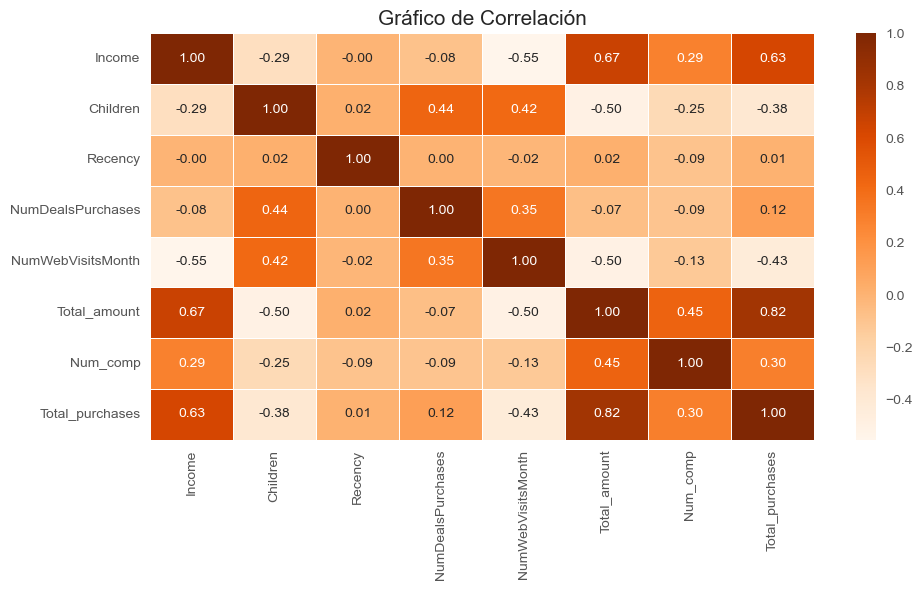

In [648]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
correlacion = data.drop(columns= ['Marital_Status', 'Age_Group','Education']).corr()
sns.heatmap(correlacion, annot=True, linewidth=.5, fmt= '.2f', cmap= 'Oranges')
plt.title("Gráfico de Correlación", fontsize=15)
plt.tight_layout()
plt.show()

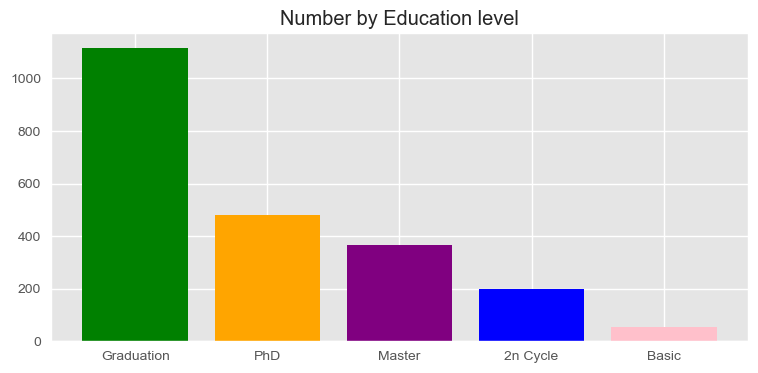

In [649]:
plt.figure(figsize = (9,4))
var = data["Education"]
varV = var.value_counts()
plt.bar(varV.index, varV, color=['green', 'orange', 'purple', 'blue', 'pink'])
plt.xticks(varV.index)
plt.title("Number by Education level")
plt.show()

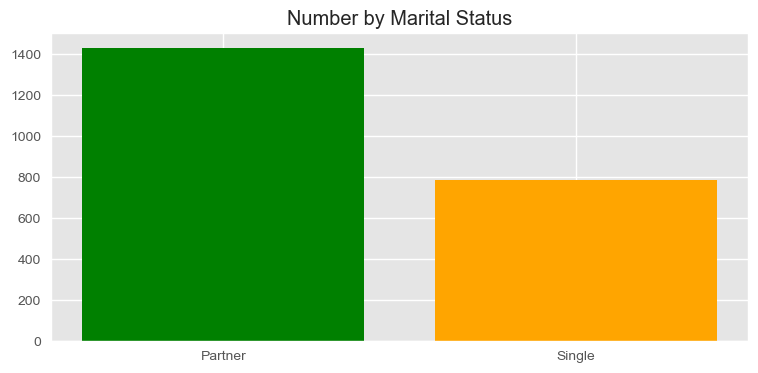

In [650]:
plt.figure(figsize = (9,4))
var = data["Marital_Status"]
varV = var.value_counts()
plt.bar(varV.index, varV, color=['green', 'orange', 'purple', 'blue', 'pink','yellow','red','brown'])
plt.xticks(varV.index)
plt.title("Number by Marital Status")
plt.show()

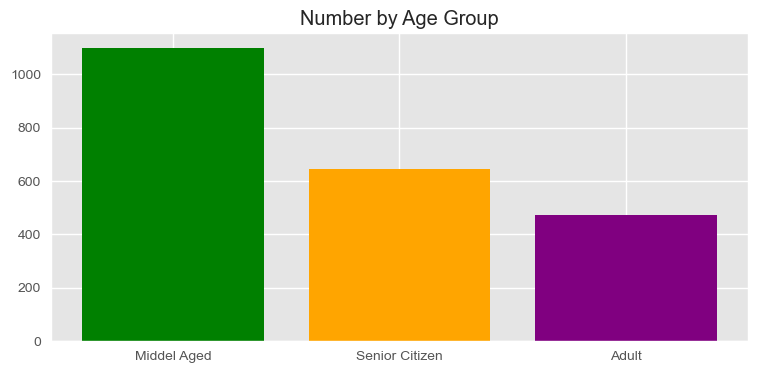

In [651]:
plt.figure(figsize = (9,4))
var = data["Age_Group"]
varV = var.value_counts()
plt.bar(varV.index, varV, color=['green', 'orange', 'purple', 'blue', 'pink','yellow','red','brown'])
plt.xticks(varV.index)
plt.title("Number by Age Group")
plt.show()

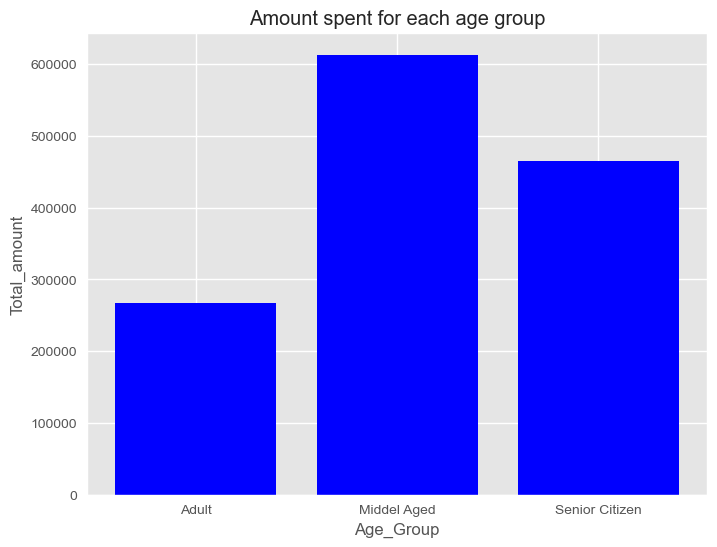

In [652]:
plt.figure(figsize=(8, 6))
plt.bar(data.groupby('Age_Group')['Total_amount'].sum().reset_index()['Age_Group'], data.groupby('Age_Group')['Total_amount'].sum().reset_index()['Total_amount'] , color = 'blue')
plt.xlabel('Age_Group')
plt.ylabel('Total_amount')
plt.title('Amount spent for each age group')
plt.show()

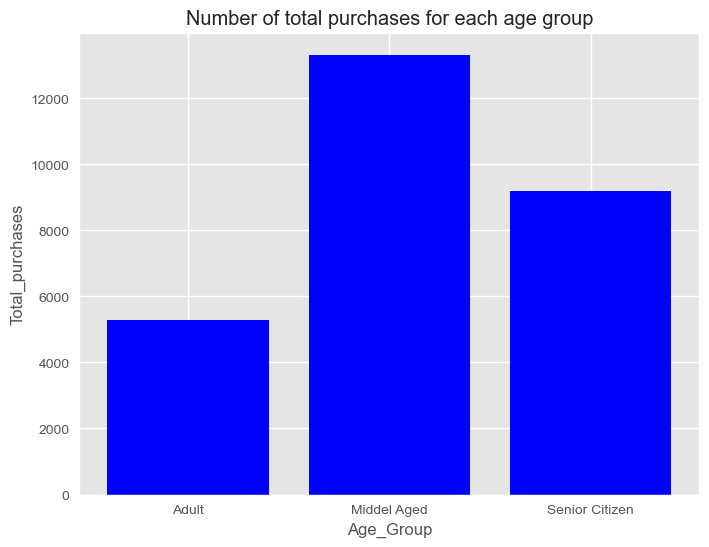

In [653]:
plt.figure(figsize=(8, 6))
plt.bar(data.groupby('Age_Group')['Total_purchases'].sum().reset_index()['Age_Group'], data.groupby('Age_Group')['Total_purchases'].sum().reset_index()['Total_purchases'],color = 'blue')
plt.xlabel('Age_Group')
plt.ylabel('Total_purchases')
plt.title('Number of total purchases for each age group')
plt.show()

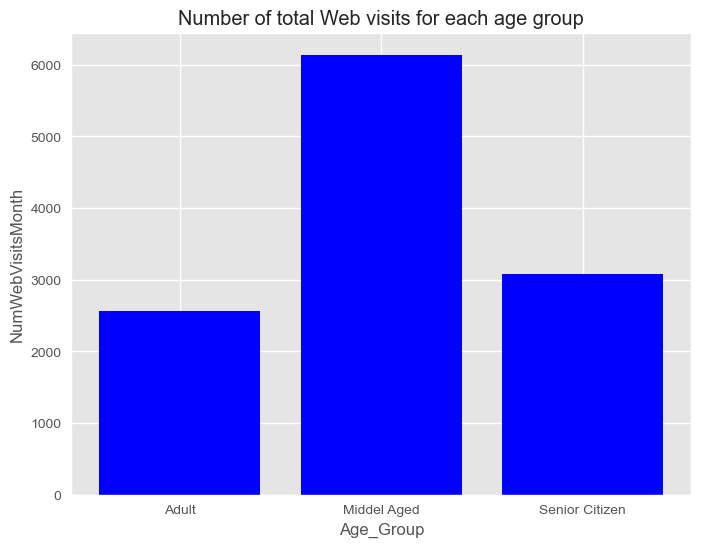

In [654]:
plt.figure(figsize=(8, 6))
plt.bar(data.groupby('Age_Group')['NumWebVisitsMonth'].sum().reset_index()['Age_Group'], data.groupby('Age_Group')['NumWebVisitsMonth'].sum().reset_index()['NumWebVisitsMonth'],color = 'blue')
plt.xlabel('Age_Group')
plt.ylabel('NumWebVisitsMonth')
plt.title('Number of total Web visits for each age group')
plt.show()

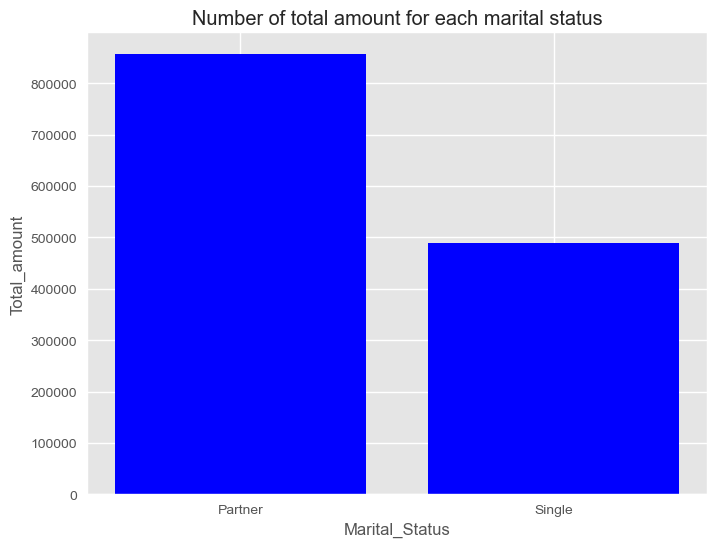

In [655]:
plt.figure(figsize=(8, 6))
plt.bar(data.groupby('Marital_Status')['Total_amount'].sum().reset_index()['Marital_Status'], data.groupby('Marital_Status')['Total_amount'].sum().reset_index()['Total_amount'],color = 'blue')
plt.xlabel('Marital_Status')
plt.ylabel('Total_amount')
plt.title('Number of total amount for each marital status')
plt.show()

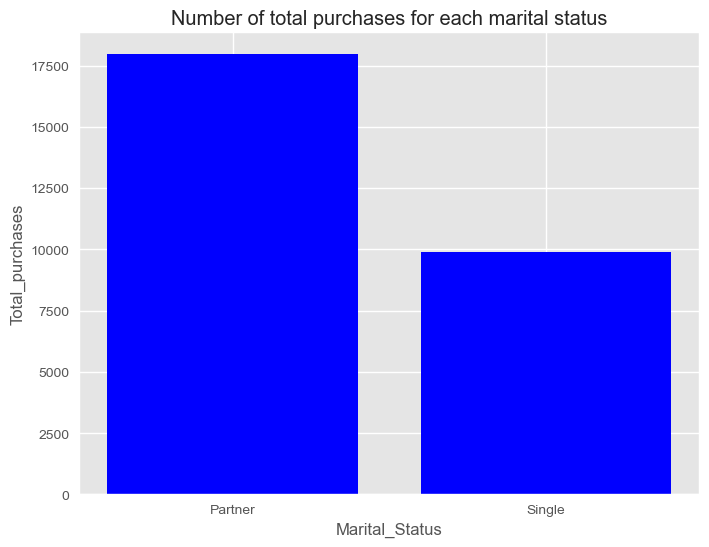

In [656]:
plt.figure(figsize=(8, 6))
plt.bar(data.groupby('Marital_Status')['Total_purchases'].sum().reset_index()['Marital_Status'], data.groupby('Marital_Status')['Total_purchases'].sum().reset_index()['Total_purchases'] ,color = 'blue')
plt.xlabel('Marital_Status')
plt.ylabel('Total_purchases')
plt.title('Number of total purchases for each marital status')
plt.show()

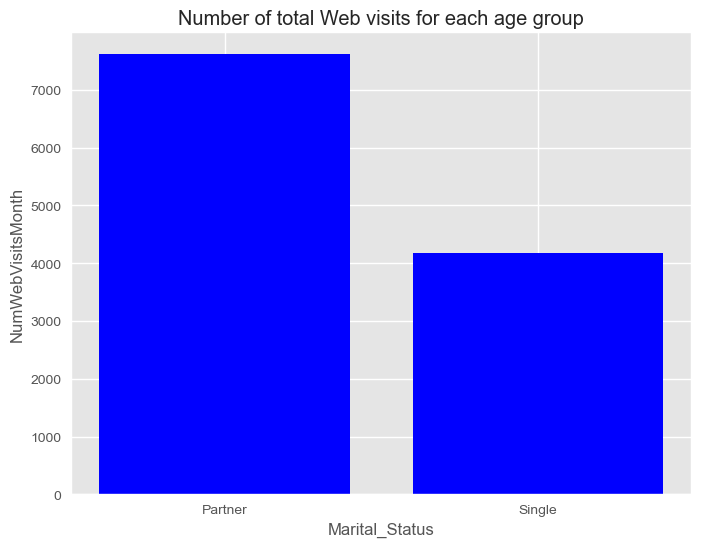

In [657]:
plt.figure(figsize=(8, 6))
plt.bar(data.groupby('Marital_Status')['NumWebVisitsMonth'].sum().reset_index()['Marital_Status'], data.groupby('Marital_Status')['NumWebVisitsMonth'].sum().reset_index()['NumWebVisitsMonth'],color = 'blue')
plt.xlabel('Marital_Status')
plt.ylabel('NumWebVisitsMonth')
plt.title('Number of total Web visits for each age group')
plt.show()

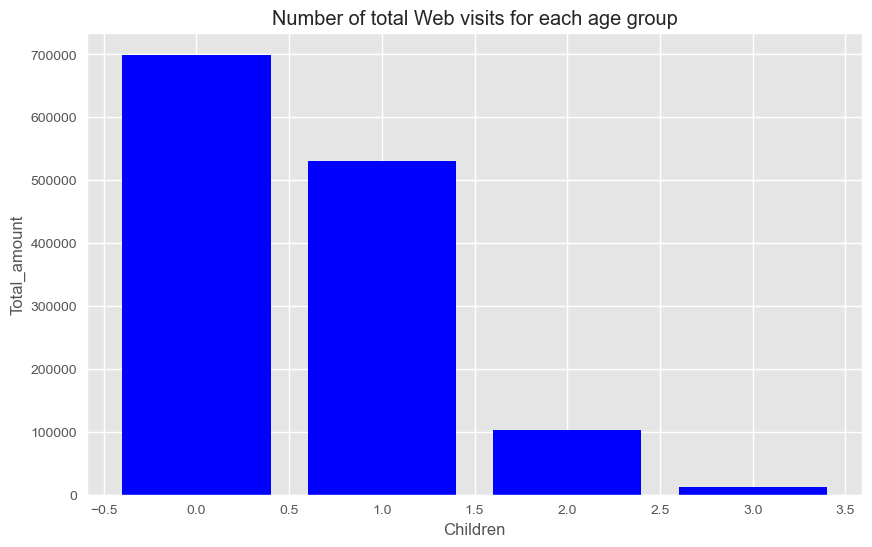

In [658]:
plt.figure(figsize=(10, 6))
plt.bar(data.groupby('Children')['Total_amount'].sum().reset_index()['Children'], data.groupby('Children')['Total_amount'].sum().reset_index()['Total_amount'],color = 'blue')
plt.xlabel('Children')
plt.ylabel('Total_amount')
plt.title('Number of total Web visits for each age group')
plt.show()

<Axes: ylabel='Num_comp'>

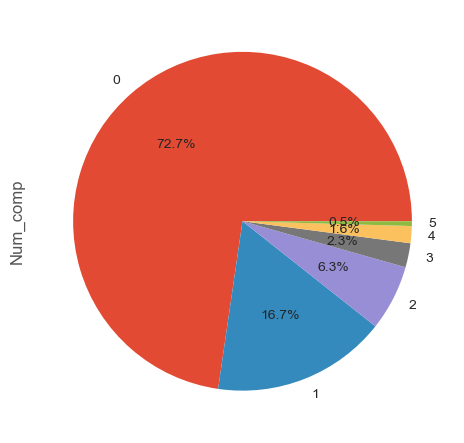

In [659]:
data['Num_comp'].value_counts().plot(kind='pie',autopct="%0.1f%%")

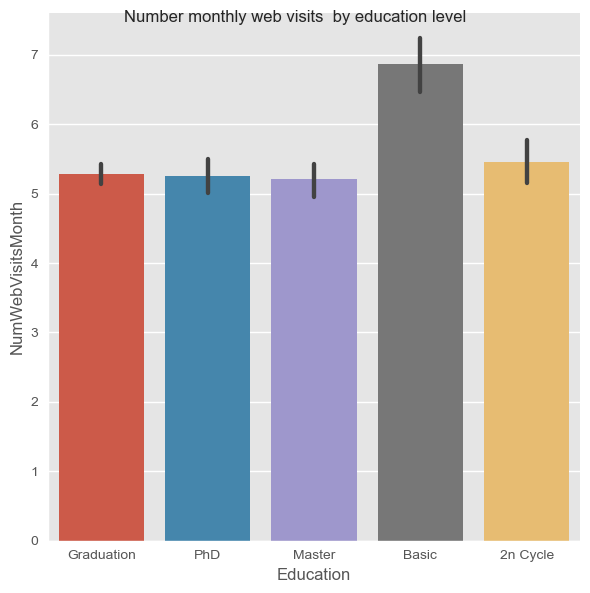

In [660]:
g = sns.catplot(x = "Education", y = "NumWebVisitsMonth", kind = "bar", data = data, height = 6)
g.fig.suptitle("Number monthly web visits  by education level")
g.set_ylabels("NumWebVisitsMonth")
plt.show()

# Categorical Encoding

In [661]:
data.dtypes

Education              object
Marital_Status         object
Income                float64
Age_Group            category
Children                int64
Recency                 int64
NumDealsPurchases       int64
NumWebVisitsMonth       int64
Total_amount            int64
Num_comp                int64
Total_purchases         int64
dtype: object

In [662]:
data['Marital_Status'] = data["Marital_Status"].replace({"Partner": 1, "Single": 0})
data["Education"] = data["Education"].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 3, "PhD": 4})
data["Age_Group"] = data["Age_Group"].replace({"Adult": 0, "Middel Aged": 1, "Senior Citizen": 2})

In [663]:
data.Age_Group = data.Age_Group.astype('int64')

In [664]:
data.dtypes

Education              int64
Marital_Status         int64
Income               float64
Age_Group              int64
Children               int64
Recency                int64
NumDealsPurchases      int64
NumWebVisitsMonth      int64
Total_amount           int64
Num_comp               int64
Total_purchases        int64
dtype: object

In [665]:
data.head()

,Education,Marital_Status,Income,Age_Group,Children,Recency,NumDealsPurchases,NumWebVisitsMonth,Total_amount,Num_comp,Total_purchases
0,1,0,58138.0,2,0,58,3,7,1617,1,22
1,1,0,46344.0,2,2,38,2,5,27,0,4
2,1,1,71613.0,1,0,26,1,4,776,0,20
3,1,1,26646.0,0,1,26,2,6,53,0,6
4,4,1,58293.0,0,1,94,5,5,422,0,14


# Outlier Removing 

In [666]:
def plot_hist(retail, col):
    plt.figure(figsize=(8, 5))
    plt.hist(retail[col], bins=30)
    plt.title("Distribution of " + col)
    return plt.show()

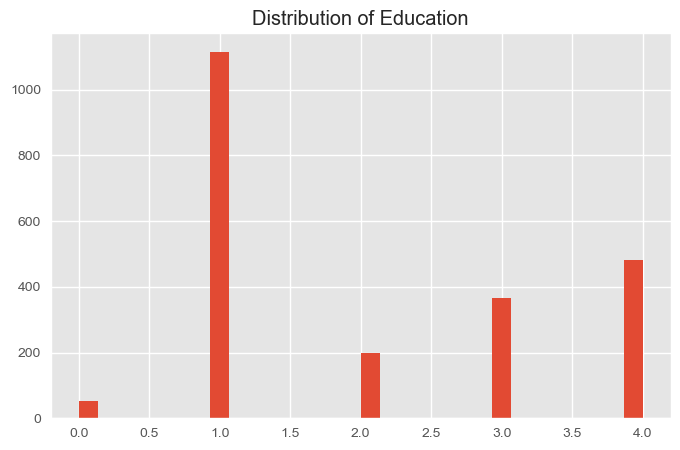

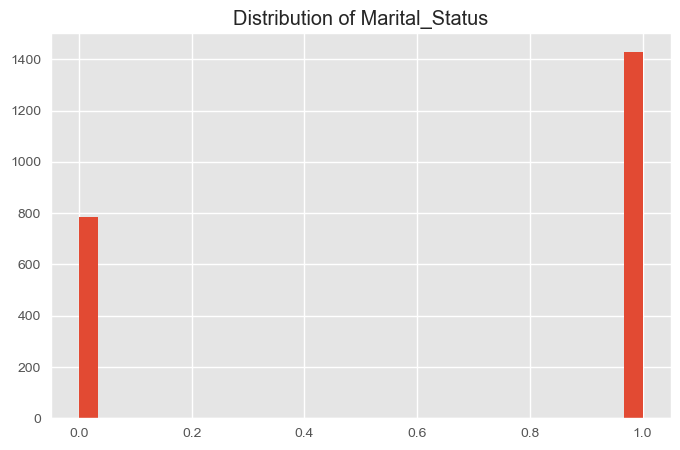

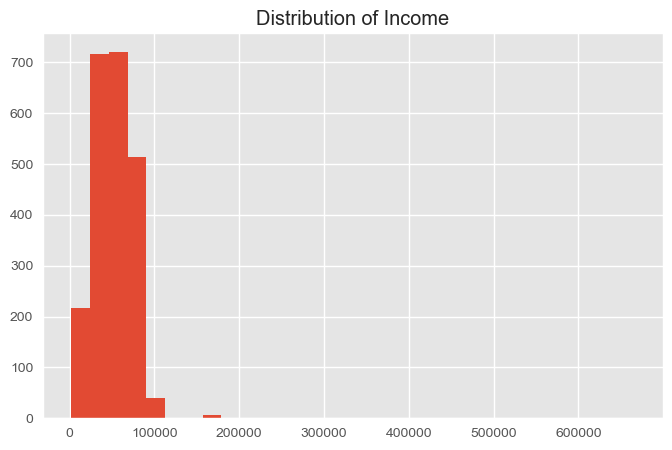

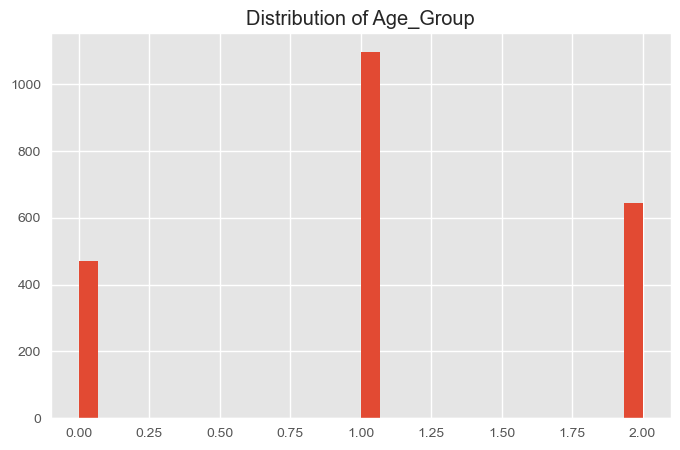

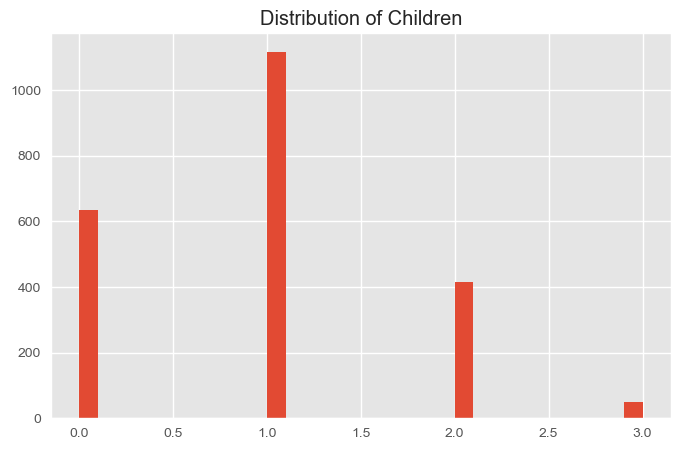

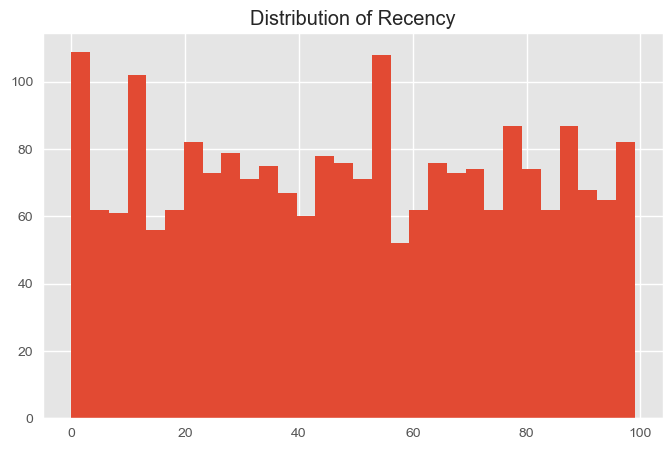

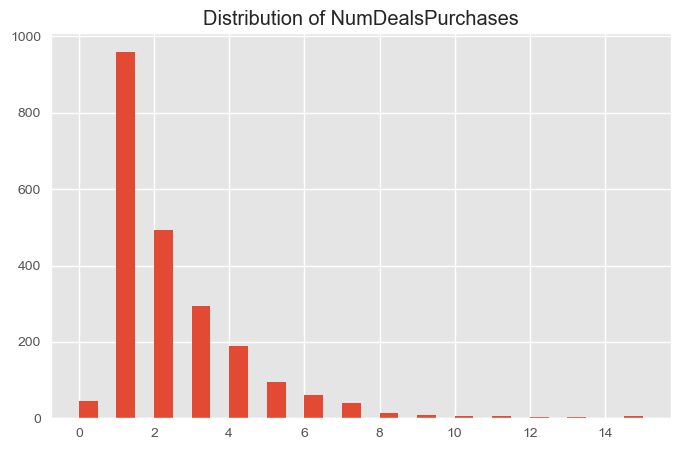

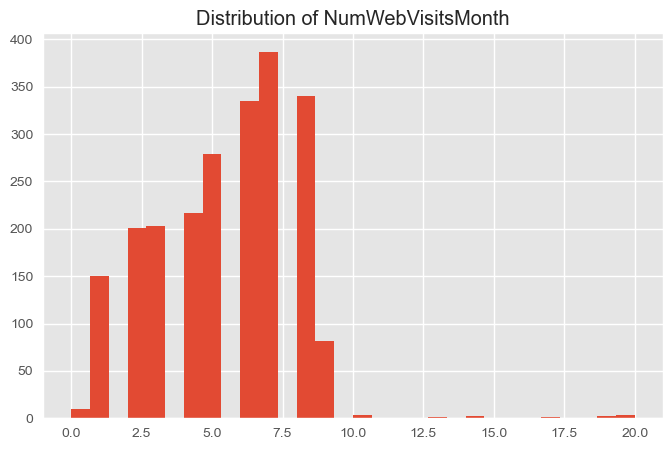

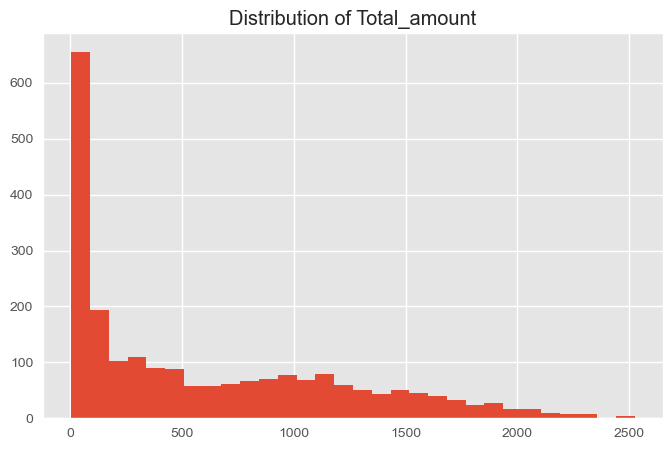

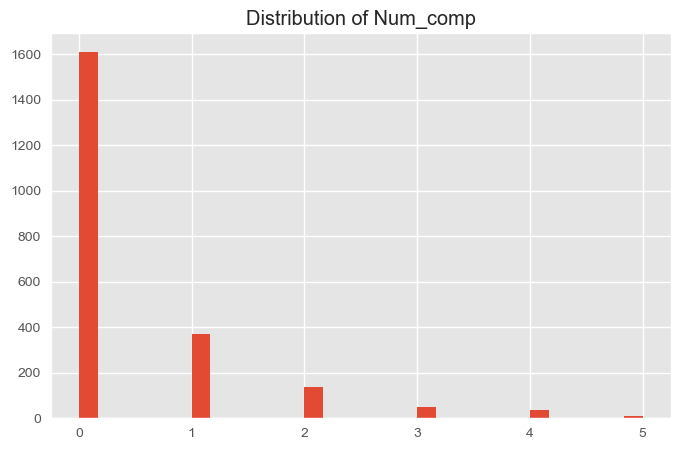

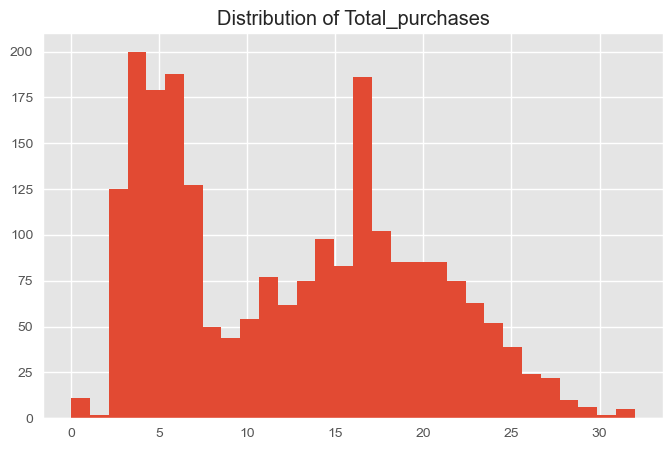

In [667]:
for i in data.columns:
    plot_hist(data,i)

In [668]:
trimmer = OutlierTrimmer(capping_method='quantiles',
                         tail='right', fold=0.05)

trimmer.fit(data)
data1 = trimmer.transform(data)

In [669]:
data1.shape

(1649, 11)

In [670]:
trimmer = OutlierTrimmer(capping_method='quantiles', variables = ['NumWebVisitsMonth','Education','Income','NumDealsPurchases'],
                         tail='left', fold=0.02)

trimmer.fit(data1)
data2 = trimmer.transform(data1)

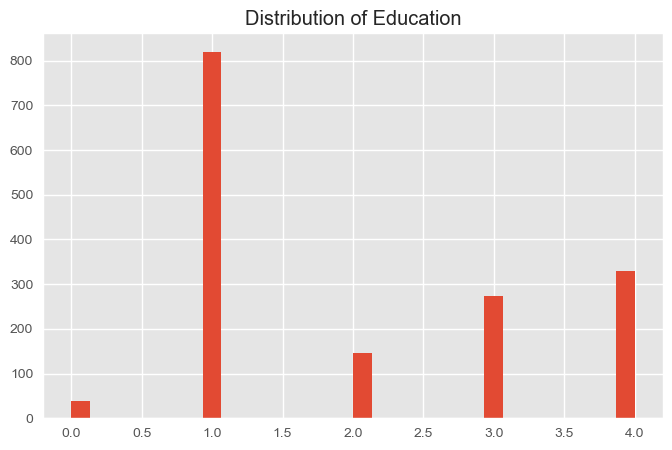

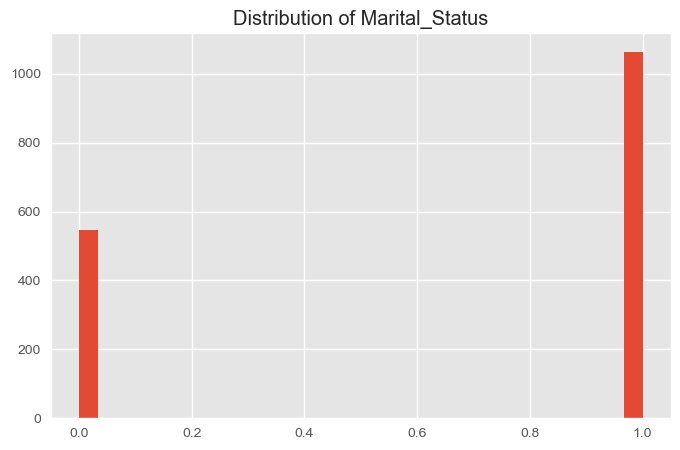

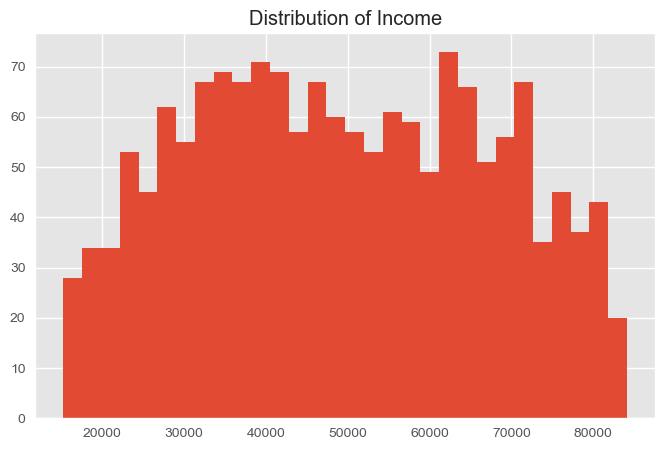

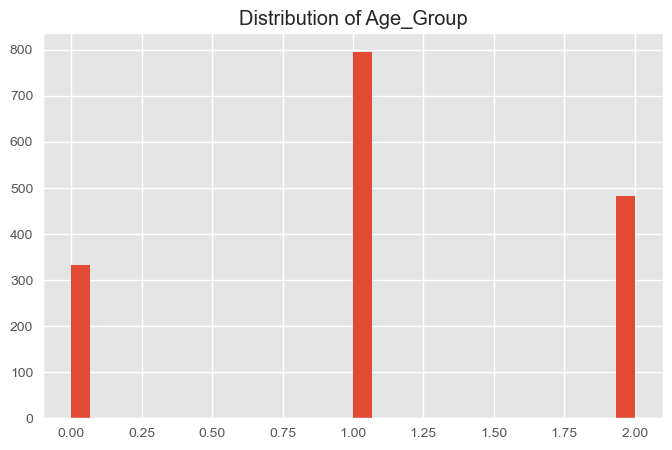

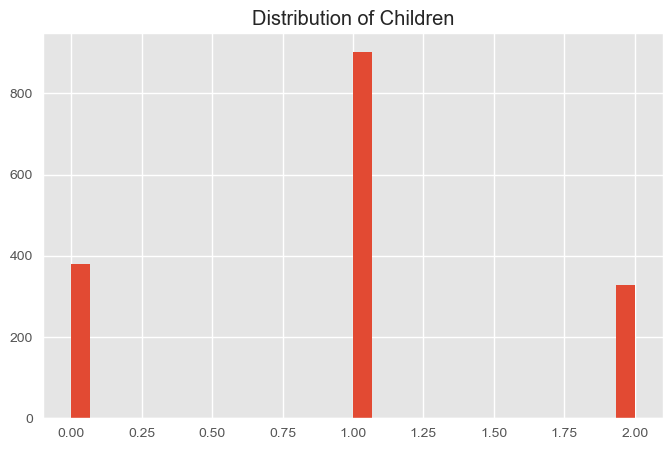

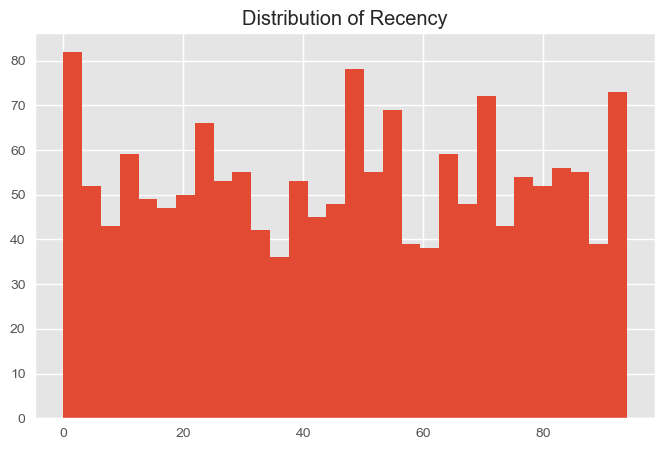

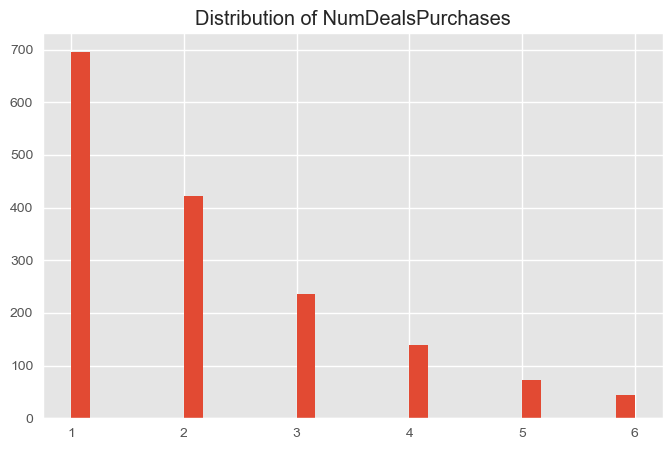

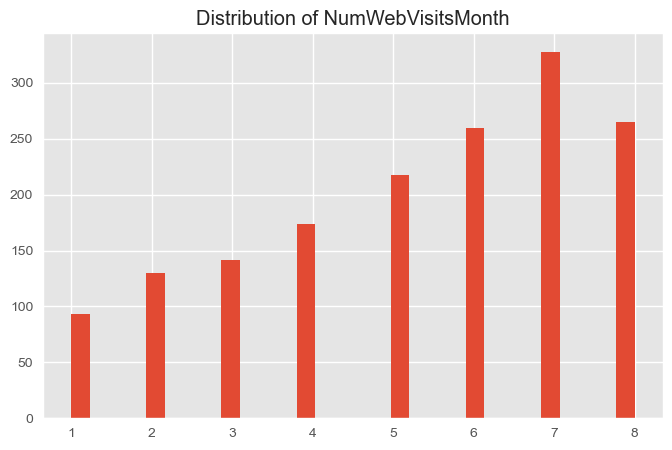

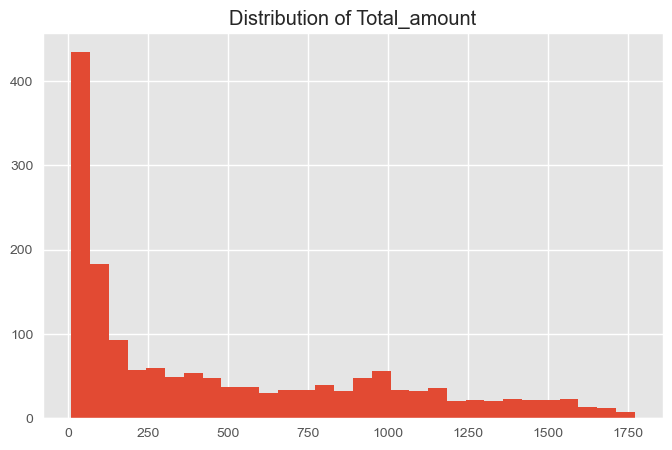

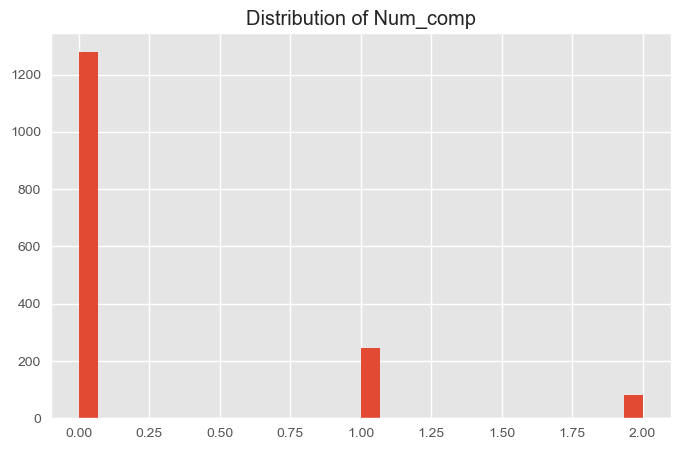

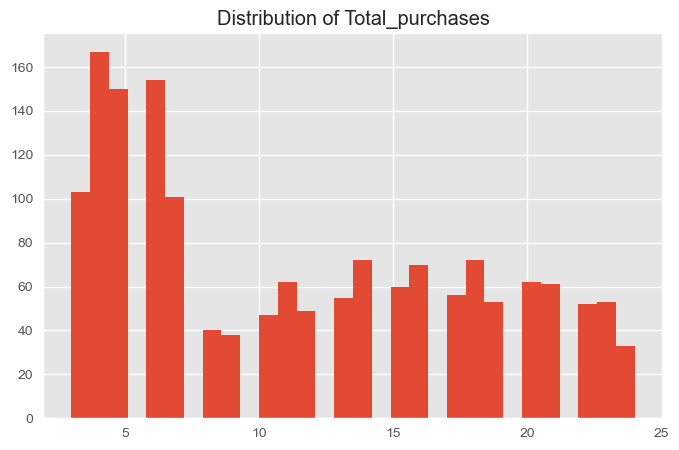

In [671]:
for i in data2.columns:
    plot_hist(data2,i)

In [672]:
data2.shape

(1610, 11)

# Performing Feature Scaling

In [673]:
scaler = MinMaxScaler()
scaler.fit(data2)
data2_scaled = scaler.transform(data2)
data3 = pd.DataFrame(data2_scaled)

In [674]:
data3

,0,1,2,3,4,5,6,7,8,9,10
0,0.25,0.0,0.622749,1.0,0.0,0.617021,0.4,0.857143,0.912082,0.5,0.904762
1,0.25,0.0,0.451484,1.0,1.0,0.404255,0.2,0.571429,0.010210,0.0,0.047619
2,0.25,1.0,0.818425,0.5,0.0,0.276596,0.0,0.428571,0.435054,0.0,0.809524
3,0.25,1.0,0.165442,0.0,0.5,0.276596,0.2,0.714286,0.024957,0.0,0.142857
4,1.00,1.0,0.625000,0.0,0.5,1.000000,0.8,0.571429,0.234260,0.0,0.523810
...,...,...,...,...,...,...,...,...,...,...,...
1605,0.25,1.0,0.278346,0.5,0.5,0.861702,0.0,0.857143,0.011912,0.0,0.000000
1606,0.25,1.0,0.667548,0.5,0.5,0.489362,0.2,0.571429,0.755530,0.0,0.619048
1607,0.25,0.0,0.605948,0.0,0.0,0.968085,0.0,0.714286,0.698809,0.5,0.714286
1608,0.75,1.0,0.784038,1.0,0.5,0.085106,0.2,0.285714,0.473057,0.0,0.857143


# Modelling

# KMeans 

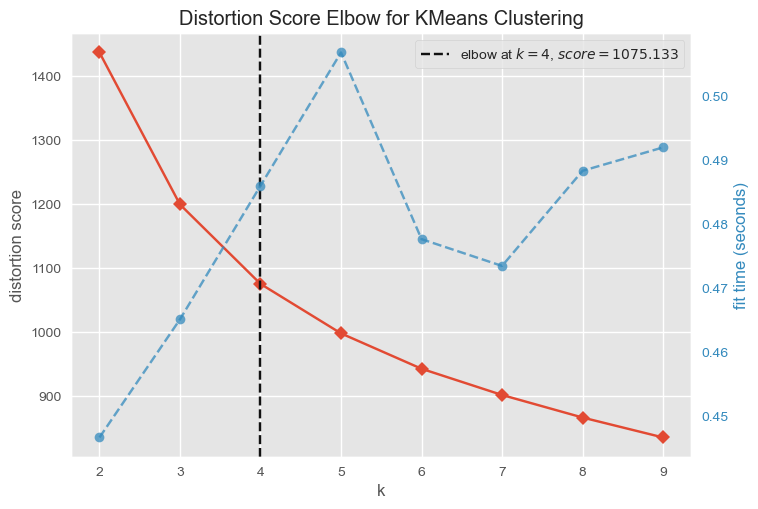

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [675]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(data3)        
visualizer.show()

In [676]:
kmeans = KMeans(n_clusters=4)

In [677]:
kmeans_predictions = kmeans.fit_predict(data3)

In [678]:
kmeans_predictions

array([1, 2, 3, ..., 1, 3, 0])

In [679]:
data3['kmeans_predictions'] = kmeans_predictions

In [680]:
 data3.kmeans_predictions.value_counts()

0    645
3    419
2    330
1    216
Name: kmeans_predictions, dtype: int64

In [681]:
silhouette_score(data3,kmeans_predictions)

0.43156085034199154

# DBSCAN

In [682]:
data3.columns = data3.columns.astype(str)

In [683]:
dbscan = DBSCAN(eps=0.9, min_samples=20)
dbscan_predictions = dbscan.fit_predict(data3)

In [684]:
dbscan_predictions

array([3, 0, 1, ..., 3, 1, 2], dtype=int64)

In [685]:
print('silhouette_score:',silhouette_score(data3,dbscan_predictions))

silhouette_score: 0.43156085034199154
